In [0]:
from sklearn.datasets import *

In [2]:
boston=load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [0]:
import pandas as pd
x=boston['data']

In [0]:
y=boston['target']

In [0]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [0]:
bos=pd.DataFrame(boston['data'])
bos.columns=boston['feature_names']
bos['Price']=boston['target']

In [9]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
from sklearn.neighbors import KNeighborsRegressor

In [0]:
train_x=boston['data'][:500]

In [0]:
train_y=boston['target'][:500]

In [0]:
KNR=KNeighborsRegressor(8)

In [14]:
KNR.fit(train_x,train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

# import numpy as np

In [0]:
test=boston['data'][500]

In [0]:
test1=test.reshape(1,-1)

In [17]:
test1

array([[2.2438e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.8500e-01,
        6.0270e+00, 7.9700e+01, 2.4982e+00, 6.0000e+00, 3.9100e+02,
        1.9200e+01, 3.9690e+02, 1.4330e+01]])

In [18]:
bos.ix[500:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [19]:

for k in [1,3,5]:
    KNR=KNeighborsRegressor(k)
    KNR.fit(train_x,train_y)
    pred_test = KNR.predict(test1)
    print("predicted value fro k={}: {}".format(k,pred_test)) 

predicted value fro k=1: [17.5]
predicted value fro k=3: [21.1]
predicted value fro k=5: [20.46]


In [0]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [21]:
rmse_val = []

for K in range(20):
    K = K+1
    KNR = KNeighborsRegressor(n_neighbors = K)
    KNR.fit(x_train,y_train)
    pred_test = KNR.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred_test)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 7.4653365630760415
RMSE value for k=  2 is: 6.483711879536451
RMSE value for k=  3 is: 6.090146989266941
RMSE value for k=  4 is: 6.183257117856762
RMSE value for k=  5 is: 6.344016451495228
RMSE value for k=  6 is: 6.536702357051173
RMSE value for k=  7 is: 6.6218412002080935
RMSE value for k=  8 is: 6.7200063849779745
RMSE value for k=  9 is: 6.601872814502669
RMSE value for k=  10 is: 6.704960702816669
RMSE value for k=  11 is: 6.6535009279063875
RMSE value for k=  12 is: 6.766187880066779
RMSE value for k=  13 is: 6.781456800539949
RMSE value for k=  14 is: 6.922153667684162
RMSE value for k=  15 is: 6.983067071924353
RMSE value for k=  16 is: 7.059003522879113
RMSE value for k=  17 is: 7.1423056695171345
RMSE value for k=  18 is: 7.188790325458435
RMSE value for k=  19 is: 7.19195114839445
RMSE value for k=  20 is: 7.1888458922943865


In [0]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

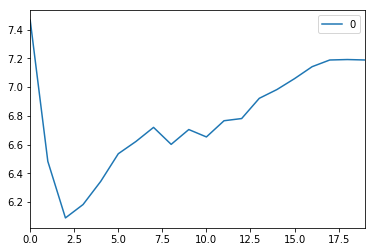

In [23]:
curve=pd.DataFrame(rmse_val)
curve.plot()
plt.show


In [24]:
for k in [1,2,3,4,5,6,7,8]:
    KNR=KNeighborsRegressor(k)
    KNR.fit(train_x,train_y)
    pred_test = KNR.predict(test1)
    print("predicted value fro k={}: {}".format(k,pred_test)) 

predicted value fro k=1: [17.5]
predicted value fro k=2: [17.9]
predicted value fro k=3: [21.1]
predicted value fro k=4: [20.75]
predicted value fro k=5: [20.46]
predicted value fro k=6: [20.45]
predicted value fro k=7: [21.31428571]
predicted value fro k=8: [21.1625]


In [0]:
test2=boston['target'][500]

#  Thankyou. well done Regression part